In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import keplergl as keplergl
import geopandas
from sklearn.mixture import GaussianMixture
from sklearn import metrics
from sklearn.preprocessing import StandardScaler 
from sklearn.preprocessing import normalize 
from sklearn.decomposition import PCA 
import pandas as pd

In [2]:
X = pd.read_csv('data/chipotle_stores.csv')
states = geopandas.read_file('data/us-states.json')
chipotle = pd.read_csv('data/chipotle_stores.csv')

In [3]:
X = X[['latitude','longitude']]

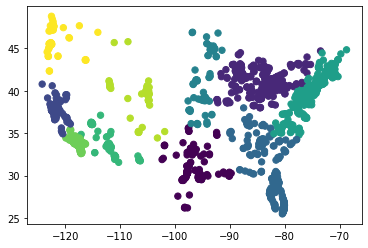

In [4]:
gmm = GaussianMixture(n_components=10).fit(X)
labels = gmm.predict(X)
plt.scatter(X['longitude'], X['latitude'],c=labels, s=40, cmap='viridis');

In [5]:
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
xrange = range
clusters = [X[labels == i] for i in xrange(n_clusters_)]
type(clusters)
type(clusters[0])

pandas.core.frame.DataFrame

In [6]:
from sklearn.neighbors.nearest_centroid import NearestCentroid
clf = NearestCentroid()
clf.fit(X,labels)
agg_dist = clf.centroids_
print(agg_dist)

[[  31.38360254  -96.57388211]
 [  41.0401086   -84.67671979]
 [  37.81743327 -121.62328429]
 [  30.40495727  -82.66101231]
 [  41.9198077   -94.28893241]
 [  39.75946414  -75.34676042]
 [  33.8587702  -112.27980905]
 [  33.8566325  -117.93962555]
 [  39.51493523 -105.85368309]
 [  46.21251733 -121.91763502]]


In [7]:
# map config 
config = {
  "version": "v1",
  "config": {
    "visState": {
      "filters": [],
      "layers": [
        {
          "id": "45t2msq",
          "type": "cluster",
          "config": {
            "dataId": "chipotle-store",
            "label": "Chipotle-store",
            "color": [
              221,
              178,
              124
            ],
            "columns": {
              "lat": "latitude",
              "lng": "longitude"
            },
            "isVisible": True,
            "visConfig": {
              "opacity": 0.8,
              "clusterRadius": 40,
              "colorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "radiusRange": [
                0,
                50
              ],
              "colorAggregation": "count"
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": None,
            "colorScale": "quantile"
          }
        },
        {
          "id": "hyk3roy",
          "type": "geojson",
          "config": {
            "dataId": "us-geo",
            "label": "us-geo",
            "color": [
              207,
              216,
              244
            ],
            "columns": {
              "geojson": "geometry"
            },
            "isVisible": True,
            "visConfig": {
              "opacity": 0.8,
              "strokeOpacity": 0.8,
              "thickness": 0.5,
              "strokeColor": [
                255,
                153,
                31
              ],
              "colorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "strokeColorRange": {
                "name": "Global Warming",
                "type": "sequential",
                "category": "Uber",
                "colors": [
                  "#5A1846",
                  "#900C3F",
                  "#C70039",
                  "#E3611C",
                  "#F1920E",
                  "#FFC300"
                ]
              },
              "radius": 10,
              "sizeRange": [
                0,
                10
              ],
              "radiusRange": [
                0,
                50
              ],
              "heightRange": [
                0,
                500
              ],
              "elevationScale": 5,
              "stroked": True,
              "filled": True,
              "enable3d": False,
              "wireframe": False
            },
            "hidden": False,
            "textLabel": [
              {
                "field": None,
                "color": [
                  255,
                  255,
                  255
                ],
                "size": 18,
                "offset": [
                  0,
                  0
                ],
                "anchor": "start",
                "alignment": "center"
              }
            ]
          },
          "visualChannels": {
            "colorField": None,
            "colorScale": "quantile",
            "sizeField": None,
            "sizeScale": "linear",
            "strokeColorField": None,
            "strokeColorScale": "quantile",
            "heightField": None,
            "heightScale": "linear",
            "radiusField": None,
            "radiusScale": "linear"
          }
        }
      ],
      "interactionConfig": {
        "tooltip": {
          "fieldsToShow": {
            "chipotle-store": [
              {
                "name": "state",
                "format": None
              },
              {
                "name": "location",
                "format": None
              },
              {
                "name": "address",
                "format": None
              }
            ],
            "us-geo": [
              {
                "name": "id",
                "format": None
              },
              {
                "name": "name",
                "format": None
              }
            ]
          },
          "compareMode": False,
          "compareType": "absolute",
          "enabled": True
        },
        "brush": {
          "size": 0.5,
          "enabled": False
        },
        "geocoder": {
          "enabled": False
        },
        "coordinate": {
          "enabled": False
        }
      },
      "layerBlending": "normal",
      "splitMaps": [],
      "animationConfig": {
        "currentTime": None,
        "speed": 1
      }
    },
    "mapState": {
      "bearing": 0,
      "dragRotate": False,
      "latitude": 40.7450002701289,
      "longitude": -87.25406180498852,
      "pitch": 0,
      "zoom": 3.309907520665008,
      "isSplit": False
    },
    "mapStyle": {
      "styleType": "dark",
      "topLayerGroups": {},
      "visibleLayerGroups": {
        "label": True,
        "road": True,
        "border": False,
        "building": True,
        "water": True,
        "land": True,
        "3d building": False
      },
      "threeDBuildingColor": [
        9.665468314072013,
        17.18305478057247,
        31.1442867897876
      ],
      "mapStyles": {}
    }
  }
}

In [8]:
kepler_map = keplergl.KeplerGl(height=400)
centroide = pd.DataFrame(data=agg_dist)
centroide.columns = ['latitude','longitude']
kepler_map.add_data(data=chipotle, name='chipotle-store')
kepler_map.add_data(data=centroide, name='centroide')
kepler_map.add_data(data=states, name='us-geo')


User Guide: https://docs.kepler.gl/docs/keplergl-jupyter


In [9]:
kepler_map

KeplerGl(config={'version': 'v1', 'config': {'visState': {'filters': [], 'layers': [{'id': '45t2msq', 'type': …

In [10]:
states

,id,name,geometry
0,AL,Alabama,POLYGON ((-87.3592960000000005 35.001179999999...
1,AK,Alaska,MULTIPOLYGON (((-131.6020210000000077 55.11798...
2,AZ,Arizona,POLYGON ((-109.0425029999999964 37.00026299999...
3,AR,Arkansas,POLYGON ((-94.4738420000000048 36.501860999999...
4,CA,California,POLYGON ((-123.2332559999999972 42.00618599999...
5,CO,Colorado,POLYGON ((-107.9197309999999987 41.00390600000...
6,CT,Connecticut,POLYGON ((-73.0535280000000000 42.039048000000...
7,DE,Delaware,POLYGON ((-75.4140890000000041 39.804456000000...
8,FL,Florida,POLYGON ((-85.4971369999999951 30.997536000000...
9,GA,Georgia,POLYGON ((-83.1091909999999956 35.001179999999...


In [11]:
chipotle

,state,location,address,latitude,longitude
0,Alabama,Auburn,"346 W Magnolia Ave Auburn, AL 36832 US",32.606813,-85.487328
1,Alabama,Birmingham,"300 20th St S Birmingham, AL 35233 US",33.509721,-86.802756
2,Alabama,Birmingham,"3220 Morrow Rd Birmingham, AL 35235 US",33.595581,-86.647437
3,Alabama,Birmingham,"4719 Highway 280 Birmingham, AL 35242 US",33.422582,-86.698279
4,Alabama,Cullman,"1821 Cherokee Ave SW Cullman, AL 35055 US",34.154134,-86.841220
...,...,...,...,...,...
2624,Wisconsin,Pleasant Prairie,"9370 76th St # B Pleasant Prairie, WI 53158 US",42.565892,-87.921048
2625,Wisconsin,Wauwatosa,"2711 N Mayfair Rd Ste A Wauwatosa, WI 53222 US",43.067723,-88.048222
2626,North Dakota,Fargo,"1204 19th Ave N Fargo, ND 58102 US",46.904247,-96.796618
2627,North Dakota,Fargo,"1680 45th St S Fargo, ND 58103 US",46.855337,-96.861416
